In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

from data import harmonic_oscillator_solution
from lossfn import mse
from model import FCN

from IPython.display import clear_output

# Train NN to simulate the Harmonic Oscillator system.

In this notebook we attempt to estimate the solution to a Harmonic oscillator system (see the data notebook).

## Inputs
- The data

## Outputs
- Estimation of the solution, eg. $x(t)$

## Approach

The NN model is trained to approximate the solution to the DE, i.e.:

$$
x_{NN}(t,\theta) \approx u(t)~,
$$
Where $\theta$ are the parameters to train.

We will be using a fully connected net

The cost function will just be a simple MSE

In [2]:
def plot_result(x,y,x_data,y_data,yh, title=None):

    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.plot(x,y, color="tab:grey", alpha=0.6, label="Exact solution")
    plt.plot(x,yh, color="tab:green", label="Neural network prediction")
    plt.scatter(x_data, y_data, label='Training data')
    l = plt.legend(loc='best')

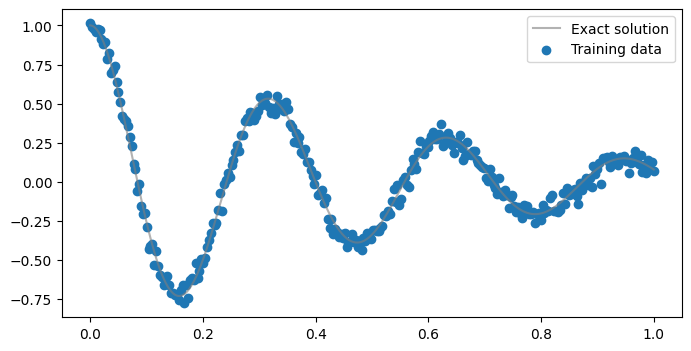

In [3]:
# Full dataset
data = pd.read_csv('./time-oscillation.csv', dtype=np.float32)

d, w0 = 2, 20
t_true = torch.linspace(0,1,500).view(-1,1)
obs_true = harmonic_oscillator_solution(d, w0, t_true)

t_data = torch.tensor(data['t'].values).view(-1,1)
obs_data = torch.tensor(data['observation'].values).view(-1,1)

plt.figure(figsize=(8,4))
plt.plot(t_true, obs_true, color="tab:grey", alpha=0.6, label="Exact solution")
plt.scatter(t_data, obs_data, label="Training data")
plt.legend()
plt.show()

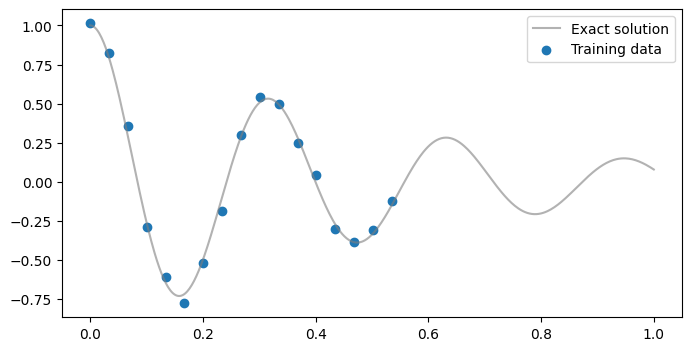

In [4]:
total = 100
percentage = 55

d, w0 = 2, 20
t_true = torch.linspace(0,1,500).view(-1,1)[:int(np.ceil(total/100*500))]
obs_true = harmonic_oscillator_solution(d, w0, t_true)

t_data = torch.tensor(data['t'].values)[:int(np.ceil(percentage/100*len(data)))][::10].view(-1,1)
obs_data = torch.tensor(data['observation'].values)[:int(np.ceil(percentage/100*len(data)))][::10].view(-1,1)

plt.figure(figsize=(8,4))
plt.plot(t_true, obs_true, color="tab:grey", alpha=0.6, label="Exact solution")
plt.scatter(t_data, obs_data, label="Training data")
plt.legend()
plt.show()

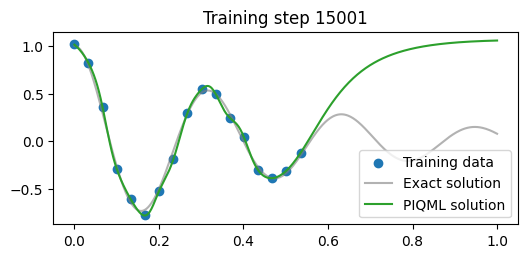


        - MSE: 6.500198423964321e-07
        
[Parameter containing:
tensor([[-1.2355],
        [-1.4430],
        [-1.2903],
        [ 1.0869],
        [ 0.8443],
        [-1.2577],
        [ 1.3448],
        [ 0.7051],
        [ 0.6126],
        [-0.4403],
        [-0.1867],
        [ 0.8713],
        [-1.3070],
        [ 0.5569],
        [-0.5331],
        [-0.5077],
        [ 1.3042],
        [ 0.7670],
        [ 1.2183],
        [ 1.2820],
        [-0.4656],
        [ 0.9905],
        [ 1.2998],
        [ 1.1015],
        [-1.0072],
        [ 1.3949],
        [-1.3567],
        [-0.2712],
        [-1.1387],
        [ 0.5662],
        [ 0.8224],
        [-0.8841]], requires_grad=True), Parameter containing:
tensor([-0.6966, -0.0932, -0.2458, -0.5810, -0.2034, -0.0879,  0.0451, -0.2653,
        -0.3350, -0.5330,  0.9079, -0.6798, -0.0548, -0.6791, -0.7398, -0.7511,
        -0.3833,  0.2146,  0.4803, -0.1122,  0.8903,  0.1333, -0.3755, -0.1352,
         0.4504, -0.3099,  0.3615,  1.

In [5]:
# torch.manual_seed(123)
model = FCN(N_INPUT=1, N_OUTPUT=1, N_HIDDEN=32, N_LAYERS=3)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
files = []
for i in range(15001):
    optimizer.zero_grad()

    prediction = model(t_data)
    loss = mse (prediction, obs_data) # use mean squared error
    loss.backward()
    optimizer.step()

    if i % 1 == 0: 
        clear_output(wait=True)
        prediction = model(t_true).detach()
        plt.figure(figsize=(6,2.5))
        plt.scatter(t_data, obs_data, label="Training data")
        plt.plot(t_true[:,0], obs_true[:,0], label="Exact solution", color="tab:grey", alpha=0.6)
        plt.plot(t_true[:,0], prediction[:,0], label="PIQML solution", color="tab:green")
        plt.title(f"Training step {i+1}")
        plt.legend()
        plt.savefig(f'./plots/NN_simple/i_{i}.png', dpi=300)
        plt.show()
        
        print(f'''
        - MSE: {loss}
        ''')
        print(list(model.parameters())) # Uncomment this to see parameters updating



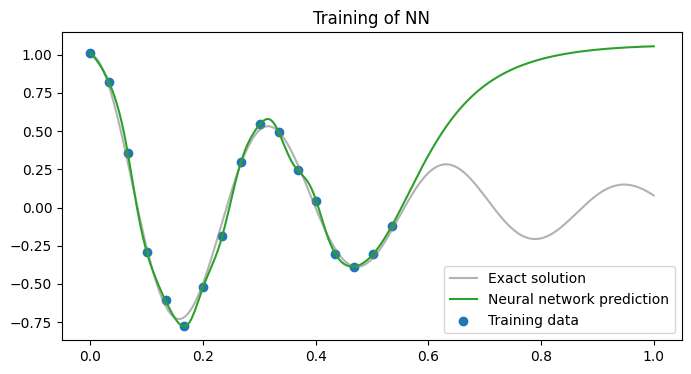

In [6]:
yh = model(t_true).detach()

mse_nn = mse(obs_true, yh)
plot_result(t_true,obs_true,t_data,obs_data,yh, title=f'Training of NN')

In [7]:
np.mean((harmonic_oscillator_solution(d=2, w0=20, t=t_true) - model(t_true)).detach().numpy())**2

0.11704223473004394